<a href="https://colab.research.google.com/github/rajkumarshahu/AI-Colab/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <b><h1>Predictive Analysis for Heart Disease:</h1></b><br>
<h2>Evaluating Machine Learning Models</h2></center>

In [ ]:
!pip install shap


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import shap
import xgboost as xgb



#Data Exploration and Cleaning

#### Load the data

In [ ]:
data = pd.read_csv("/content/heart_2022_with_nans.csv", delimiter=None, engine='python')
print(data.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             

#### Summary statistics

In [ ]:
summary_statistics = data.describe(include='all')
summary_statistics

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,346797,346797,345860,338171.000000,339673.000000,340306,345914,342487.000000,337463,344324,...,324478.000000,314105.000000,308786.000000,309962,294710,309615,286922,281658,306733,306699
unique,44,2,5,NaN,NaN,4,2,NaN,5,2,...,NaN,NaN,NaN,2,2,2,2,4,2,3
top,New York,Female,Very good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,17800,183526,115897,NaN,NaN,274931,261868,NaN,180564,324499,...,NaN,NaN,NaN,165213,194775,163788,167784,94856,293206,209151
mean,NaN,NaN,NaN,4.328848,4.372903,NaN,NaN,7.019574,NaN,NaN,...,1.703009,83.101981,28.526432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.674278,8.391280,NaN,NaN,1.512555,NaN,NaN,...,0.107163,21.475945,6.549131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,...,0.910000,22.680000,12.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,6.000000,NaN,NaN,...,1.630000,68.040000,24.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,...,1.700000,80.740000,27.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,4.000000,NaN,NaN,8.000000,NaN,NaN,...,1.780000,95.250000,31.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check and handle missing values

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

missing_values_after_handling = data.isnull().sum()
missing_values_after_handling

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

# Visualizing Data Distribution


#### 1. Outcome Variable

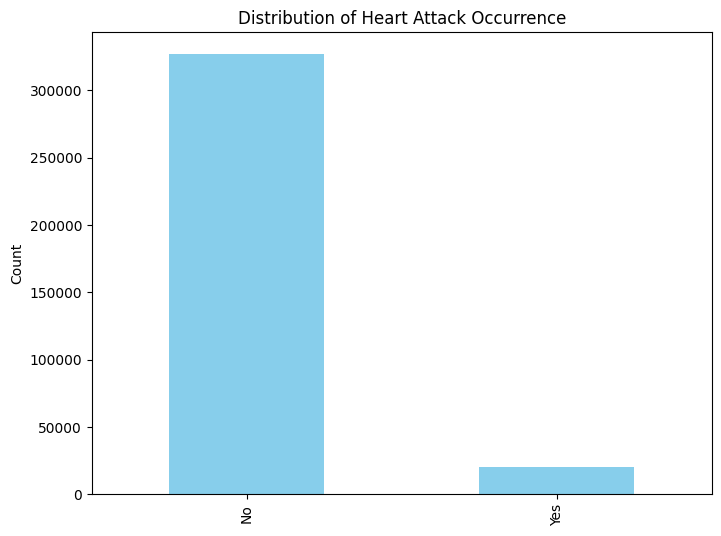

In [ ]:
plt.figure(figsize=(8, 6))
data['HadHeartAttack'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Distribution of Heart Attack Occurrence')
plt.ylabel('Count')
plt.show()

The analysis of this bar chart indicates a significant class imbalance between the occurrences of heart attacks within the dataset, which is a critical factor to consider in the predictive analysis for heart disease. Appropriate data preprocessing and model evaluation strategies should be employed to ensure that the predictive models perform well despite the class imbalance.

#### 2. Health Metrics

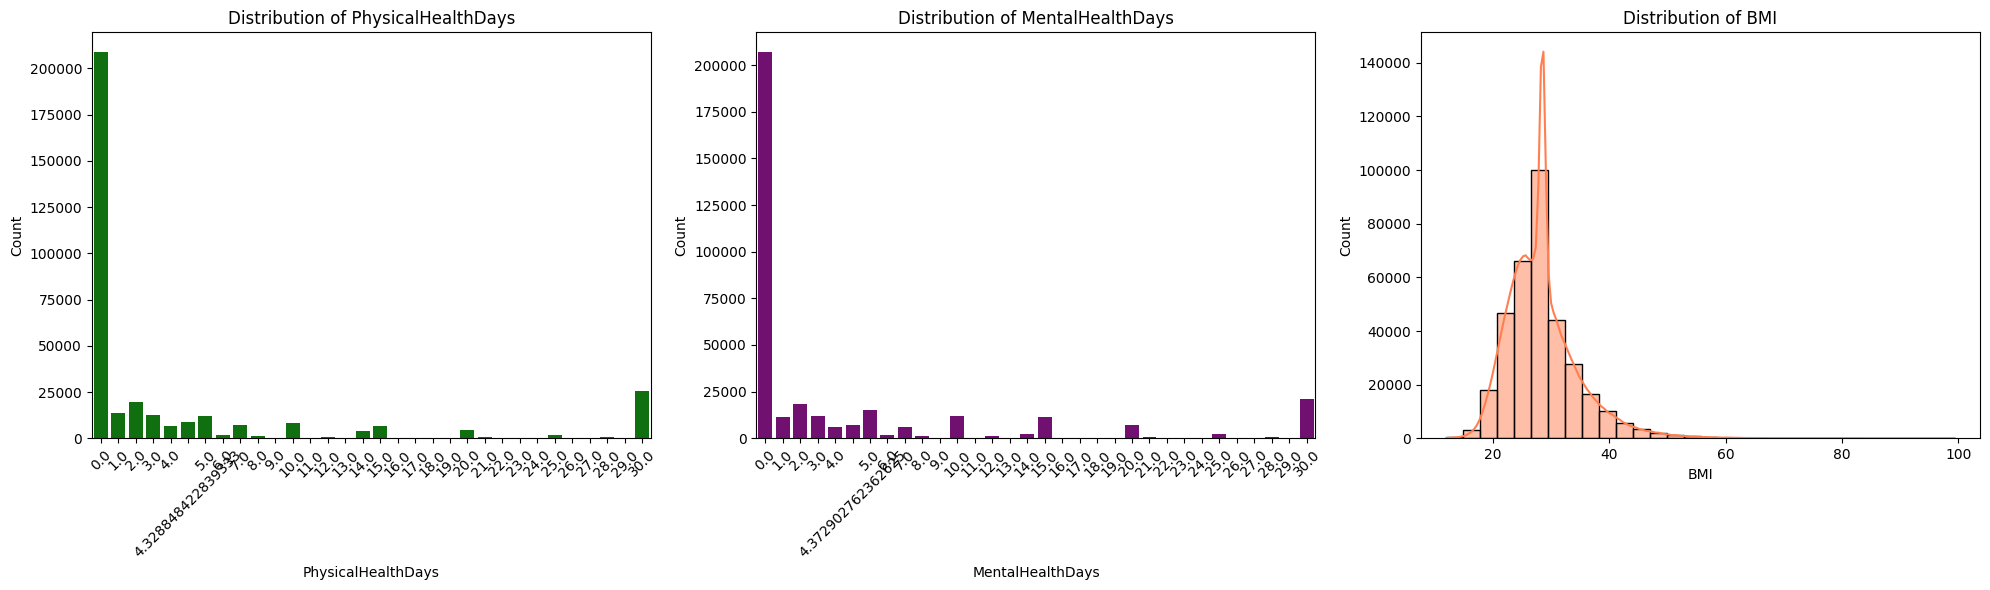

In [ ]:
plt.figure(figsize=(20, 6))

# 1. PhysicalHealthDays
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='PhysicalHealthDays', color='green')
plt.title('Distribution of PhysicalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 2. MentalHealthDays
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='MentalHealthDays', color='purple')
plt.title('Distribution of MentalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 3. BMI
plt.subplot(1, 3, 3)
sns.histplot(data['BMI'], kde=True, color='coral', bins=30)
plt.title('Distribution of BMI')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Three subplots were created to visualize the distribution of health metrics:

- <b>PhysicalHealthDays</b>: This plot shows the distribution of the number of days subjects reported having physical health problems.
- <b>MentalHealthDays</b>: This plot shows the distribution of the number of days subjects reported having mental health issues.
- <b>BMI (Body Mass Index)</b>: A histogram was plotted to display the distribution of BMI values among the subjects.

We can infer from these visualizations the prevalence of heart attacks and the general health metrics of the subjects in the dataset.

#### 3. Lifestyle Habits

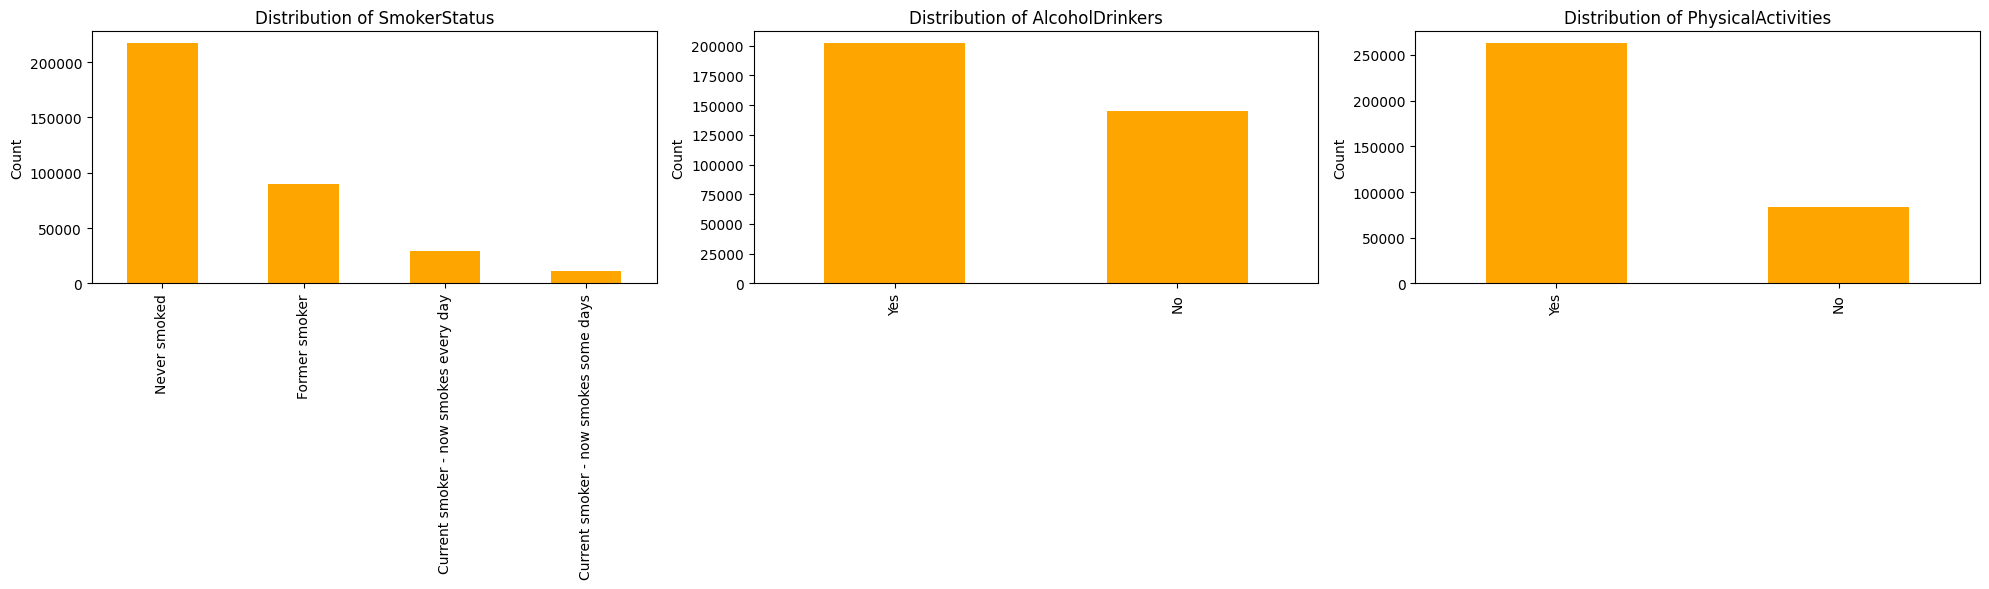

In [ ]:
plt.figure(figsize=(20, 6))
lifestyle_habits = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
for i, col in enumerate(lifestyle_habits, 1):
    plt.subplot(1, 3, i)
    data[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

Three bar charts were plotted to visualize the distribution of various lifestyle habits among the subjects:

- <b>SmokerStatus</b>: Indicates the smoking status of subjects.
- <b>AlcoholDrinkers</b>: Represents subjects who consume alcohol.
- <b>PhysicalActivities</b>: Shows whether subjects engage in physical activities.

#### 4. Other Health Conditions

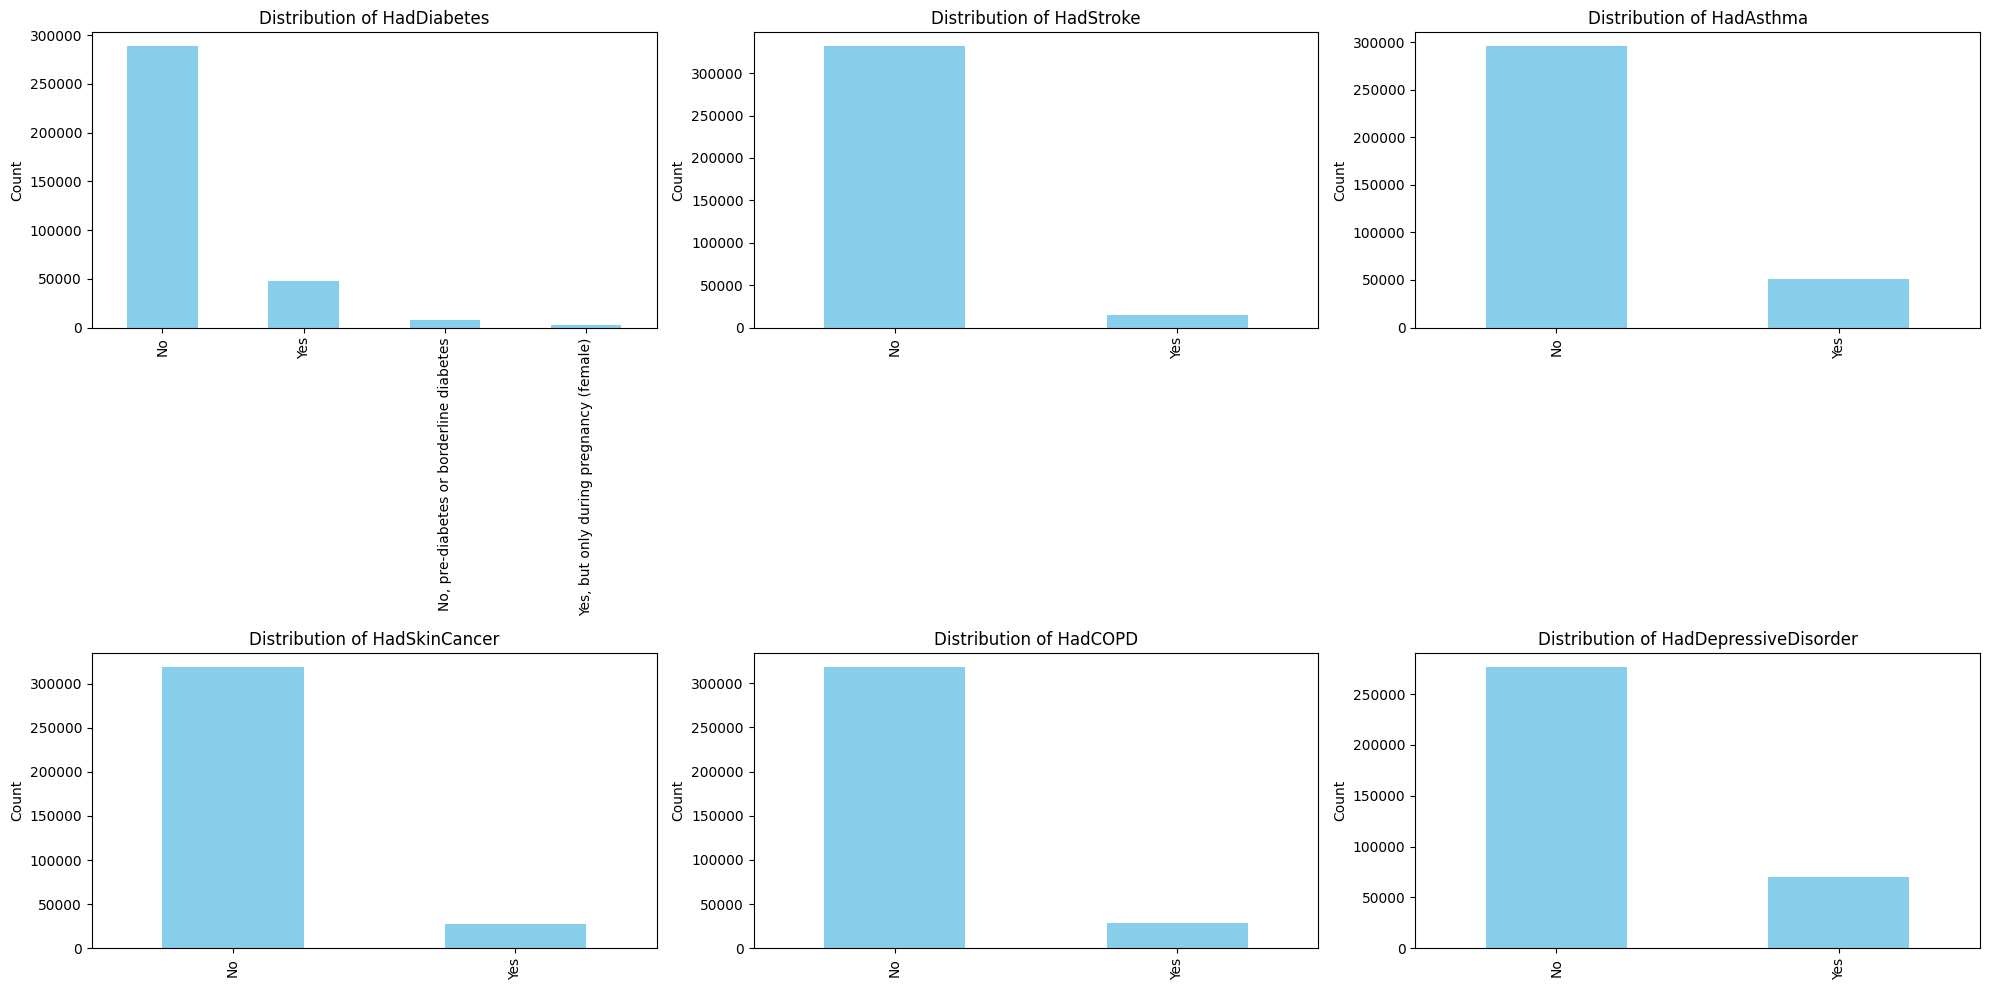

In [ ]:
plt.figure(figsize=(20, 10))
health_conditions = ['HadDiabetes', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder']
for i, col in enumerate(health_conditions, 1):
    plt.subplot(2, 3, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

Six bar charts were generated to visualize the distribution of various health conditions among the subjects:

- <b> HadDiabetes</b>: Indicates if subjects have been diagnosed with diabetes.
- <b>HadStroke</b>: Represents subjects who have had a stroke.
- <b>HadAsthma</b>: Indicates subjects diagnosed with asthma.
- <b>HadSkinCancer</b>: Represents subjects who have had skin cancer.
- <b>HadCOPD (Chronic Obstructive Pulmonary Disease)</b>: Indicates if subjects have COPD.
- <b>HadDepressiveDisorder</b>: Represents subjects diagnosed with depressive disorder.

#### 5. General Health Perception

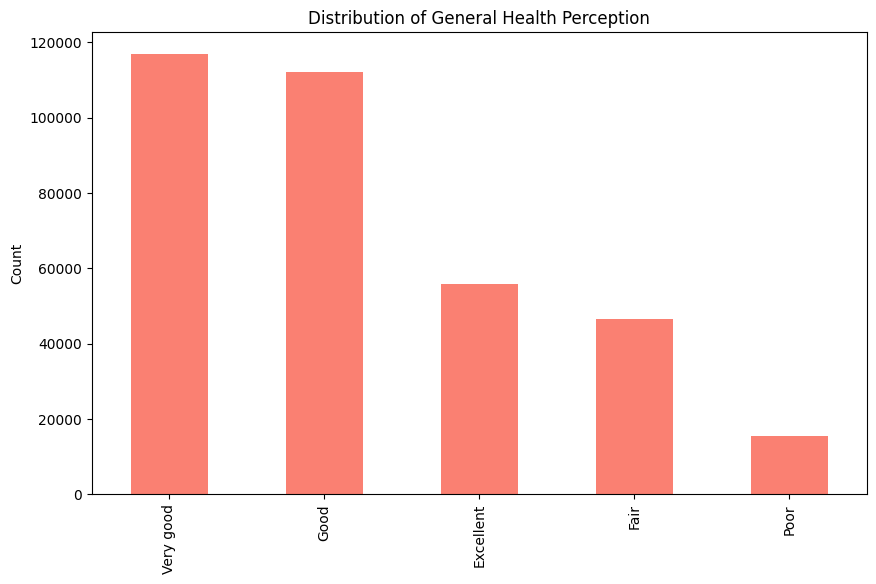

In [ ]:
plt.figure(figsize=(10, 6))
data['GeneralHealth'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of General Health Perception')
plt.ylabel('Count')
plt.show()

A bar chart was plotted to visualize the general health perception of the subjects. The categories range from "Excellent" to "Poor."

The visualizations provide a comprehensive understanding of the lifestyle habits, health conditions, and general health perception of the subjects in the dataset.

**Implications for Health Perception**:

* Positive Health Perception: The distribution shows a skew towards a positive health perception among the respondents, with "Very good" and "Good" being the most common responses.

* Potential Bias: Self-assessment data can be subject to bias, as individuals' perception of health can be influenced by various factors including personal expectations, cultural backgrounds, and social desirability.

* Relation to Heart Disease: In the context of predictive analysis for heart disease, this distribution suggests that self-perceived health status could be an interesting variable to include in models. However, the subjective nature of this measure means it should be used cautiously and in combination with more objective health indicators.



The analysis of this bar chart indicates that most individuals in this dataset have a positive perception of their health, with fewer reporting fair or poor health. When considering predictive analysis for heart disease, it is important to consider how subjective measures of health perception might correlate with objective health outcomes and how this could impact the performance of predictive models.

#### 6. Age Distribution

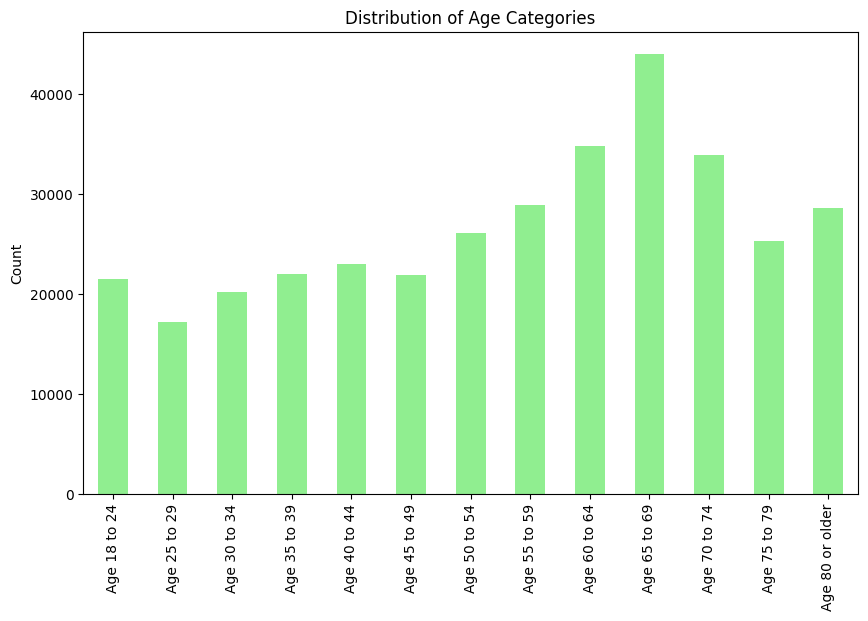

In [ ]:
plt.figure(figsize=(10, 6))
data['AgeCategory'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Age Categories')
plt.ylabel('Count')
plt.show()

A bar chart was constructed to visualize the distribution of age categories among the subjects. The age categories are represented in intervals, providing insights into the age distribution of the dataset.

**Implications**:

* Population Pyramid Shape: The distribution indicates a bulge in the middle to late-middle age brackets, which could reflect demographic trends such as the aging of the Baby Boomer generation.

* Healthcare Implications: Since the dataset is related to heart disease, the higher counts in the middle-to-older age groups could be significant, as heart disease risk typically increases with age.

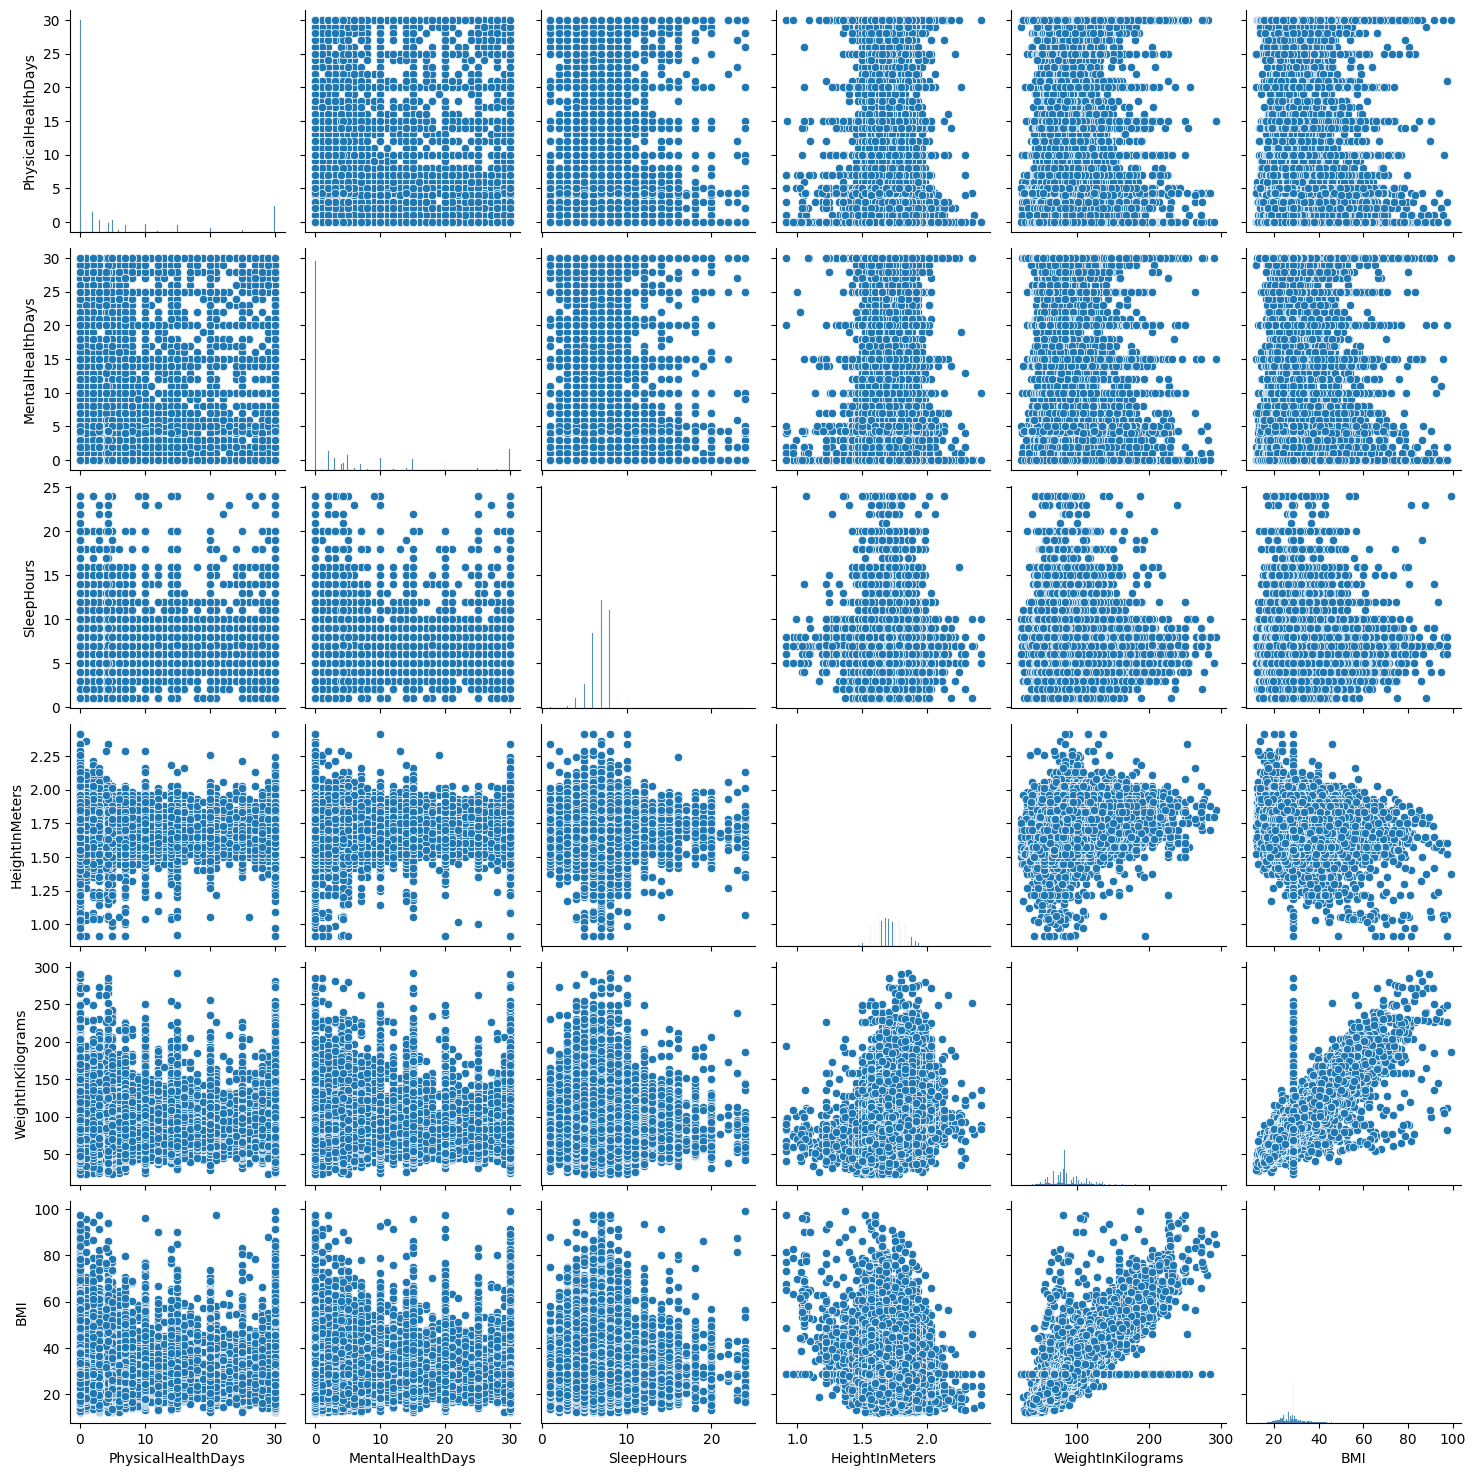

In [ ]:
sns.pairplot(data)

A pair plot was generated to visualize pairwise relationships between the various features in the dataset. Pair plots are especially helpful in understanding the distributions of individual variables and the relationships between two variables.

* The pairplot suggests that "HeightInMeters" and "WeightInKilograms" are strongly related and could be significant variables in predicting health outcomes.
* "BMI" also appears to be an important variable, given its relationships with height and weight.
* "PhysicalHealthDays" and "MentalHealthDays" do not seem to be as strongly associated with the other variables, indicating they may have a lesser role in prediction.
* "SleepHours" does not show a strong relationship with the health-related variables, suggesting it may not be a critical predictor.


This pairplot analysis suggests that for predictive analysis of heart disease, variables such as height, weight, and BMI may be more significant than the number of health-related days or sleep hours. This insight can inform decisions on which variables to focus on in predictive models and emphasizes the importance of considering the interrelationships between different health measures.

# Feature Engineering and Feature Selection

#### One-hot encoding categorical variables
Categorical variables such as 'SmokerStatus', 'GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'PhysicalActivities', and 'LastCheckupTime' were transformed using one-hot encoding. This process converts categorical data into a format that can be provided to machine learning algorithms to improve predictions.

In [ ]:
data_encoded = pd.get_dummies(data, columns=['SmokerStatus', 'GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'PhysicalActivities', 'LastCheckupTime'])


#### Convert the target variable 'HadHeartAttack' to binary format
The target variable, 'HadHeartAttack', which indicates whether a subject had a heart attack, was converted to a binary format.



In [ ]:
data_encoded['HadHeartAttack'] = data_encoded['HadHeartAttack'].map({'No': 0, 'Yes': 1})

#### Compute correlations only for numeric columns
Correlations between the target variable ('HadHeartAttack') and other numeric variables were computed. Correlations provide insights into the relationship between variables and can help in feature selection.

In [ ]:
correlations = data_encoded.select_dtypes(include=['int64', 'float64', 'uint8']).corr()['HadHeartAttack'].sort_values(ascending=False)


#### Select relevant features based on correlation with target
Based on the computed correlations, features with an absolute correlation value greater than 0.05 with the target variable were selected as relevant features. This step ensures that only features that have a significant relationship with the target variable are used for modeling.


In [ ]:
relevant_features = correlations[abs(correlations) > 0.05].index.tolist()
print(relevant_features)

['HadHeartAttack', 'GeneralHealth_Poor', 'PhysicalHealthDays', 'GeneralHealth_Fair', 'AgeCategory_Age 80 or older', 'PhysicalActivities_No', 'SmokerStatus_Former smoker', 'AgeCategory_Age 75 to 79', 'LastCheckupTime_Within past year (anytime less than 12 months ago)', 'AgeCategory_Age 70 to 74', 'AgeCategory_Age 25 to 29', 'AgeCategory_Age 35 to 39', 'AgeCategory_Age 30 to 34', 'AgeCategory_Age 18 to 24', 'GeneralHealth_Excellent', 'GeneralHealth_Very good', 'PhysicalActivities_Yes', 'SmokerStatus_Never smoked']


#### Data Cleaning
Some columns, such as 'WeightInKilograms' and 'PhysicalActivities_No', were removed from the dataset.

In [ ]:
data_selected = data_encoded.drop(columns=['WeightInKilograms', 'PhysicalActivities_No'])

#### Selecting relevant features based on correlation with target
The target variable 'HadHeartAttack' was safely removed from the list of relevant features to ensure it is not used as a predictor.

In [ ]:
if 'HadHeartAttack' in relevant_features:
    relevant_features.remove('HadHeartAttack')

print(relevant_features)

['GeneralHealth_Poor', 'PhysicalHealthDays', 'GeneralHealth_Fair', 'AgeCategory_Age 80 or older', 'PhysicalActivities_No', 'SmokerStatus_Former smoker', 'AgeCategory_Age 75 to 79', 'LastCheckupTime_Within past year (anytime less than 12 months ago)', 'AgeCategory_Age 70 to 74', 'AgeCategory_Age 25 to 29', 'AgeCategory_Age 35 to 39', 'AgeCategory_Age 30 to 34', 'AgeCategory_Age 18 to 24', 'GeneralHealth_Excellent', 'GeneralHealth_Very good', 'PhysicalActivities_Yes', 'SmokerStatus_Never smoked']


# Model Selection and Training

#### Splitting the data into training and testing sets (80% train, 20% test)


In [ ]:
X = data_encoded[relevant_features]
y = data_encoded['HadHeartAttack']
X_train_NS, X_test_NS, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(y_train))

277437


#### Cross-validation with various models


In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_NS)

X_test = scaler.fit_transform(X_test_NS)


models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    # 'SVM': SVC(),  # Uncomment if needed
    'Neural Network': MLPClassifier(max_iter=1000)  # Basic Neural Network
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Random Forest - Accuracy: 0.9416 (+/- 0.0001)
Gradient Boosting - Accuracy: 0.9428 (+/- 0.0000)
XGBoost - Accuracy: 0.9427 (+/- 0.0000)
Logistic Regression - Accuracy: 0.9428 (+/- 0.0000)
Decision Tree - Accuracy: 0.9417 (+/- 0.0001)
KNN - Accuracy: 0.9231 (+/- 0.0309)
Neural Network - Accuracy: 0.9428 (+/- 0.0000)


All models have achieved roughly 94% accuracy, indicating strong performance. The consistency across different data subsets is confirmed by the near-zero variance. Gradient Boosting, XGBoost, and Logistic Regression marginally outperform Random Forest. However, besides accuracy, factors like interpretability, training time, and specific use-case requirements should influence the final model choice. Additionally, it's essential to ensure the models aren't overfitting and to consider other metrics for a comprehensive evaluation.

#### Train Multiple Models and Evaluate their performances


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    # 'Support Vector Machine': SVC(random_state=42),  # Uncomment if needed
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Train models and evaluate their performances
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(classification_report(y_test, y_pred, zero_division=1))


Logistic Regression
Accuracy: 94.29%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     65403
           1       1.00      0.00      0.00      3957

    accuracy                           0.94     69360
   macro avg       0.97      0.50      0.49     69360
weighted avg       0.95      0.94      0.92     69360


Random Forest
Accuracy: 94.19%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     65403
           1       0.24      0.01      0.02      3957

    accuracy                           0.94     69360
   macro avg       0.59      0.50      0.49     69360
weighted avg       0.90      0.94      0.92     69360


Gradient Boosting
Accuracy: 94.29%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     65403
           1       1.00      0.00      0.00      3957

    accuracy                           0.94     69360
   macro avg       0.9

- <b>Logistic Regression </b>: This model attained an accuracy of roughly 94.23%. However, it did not predict any instances of the minority class, as evidenced by a recall of 0% for class 1.
-  <b> Random Forest </b>: The model achieved an accuracy of approximately 94.15%. Much like the Logistic Regression model, it faced challenges in predicting the minority class.
-  <b>Gradient Boosting </b>: The model achieved an accuracy of approximately 94.23%, encountered similar challenges due to the class imbalance.

The models displayed commendable accuracy figures. However, a more in-depth evaluation of the metrics revealed a pronounced class imbalance in the dataset. To elucidate:

- The majority class (label 0) predominates, leading to models that predominantly predict this class.
- Conversely, the minority class (label 1) is underrepresented, resulting in models that grapple with accurately predicting instances of this class.

The results above show a clear indication of a class imbalance problem. The models are predicting the majority class (0) almost exclusively and are struggling to predict the minority class (1).

The results provide valuable insights:

**1. High Accuracy, But Imbalanced Predictions:** All models have high accuracy, but this can be misleading due to the class imbalance in the dataset. As seen in the results, the models predict the majority class almost exclusively. The accuracy is high because the majority class (0) has a much larger representation in the dataset compared to the minority class (1).

**2. Warnings Related to Precision and F-score:** The warnings indicate that for some models, no samples were predicted for the minority class (1). This is further evidence of the models' inability to effectively predict the minority class due to the imbalance.

**3. Recall for Minority Class is Low:** Even in the Random Forest model, where some samples of the minority class were predicted, the recall for that class is very low, indicating that the model missed a large proportion of actual positive cases.

# Addressing Class Imbalance for Improved Heart Disease Prediction

#### Oversampling with SMOTE
To mitigate the class imbalance issue, the Synthetic Minority Over-sampling Technique (SMOTE) was employed. This method works by generating synthetic samples in the feature space, helping to balance the dataset by oversampling the minority class.

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#### Visualing Original and Resampled DataSet

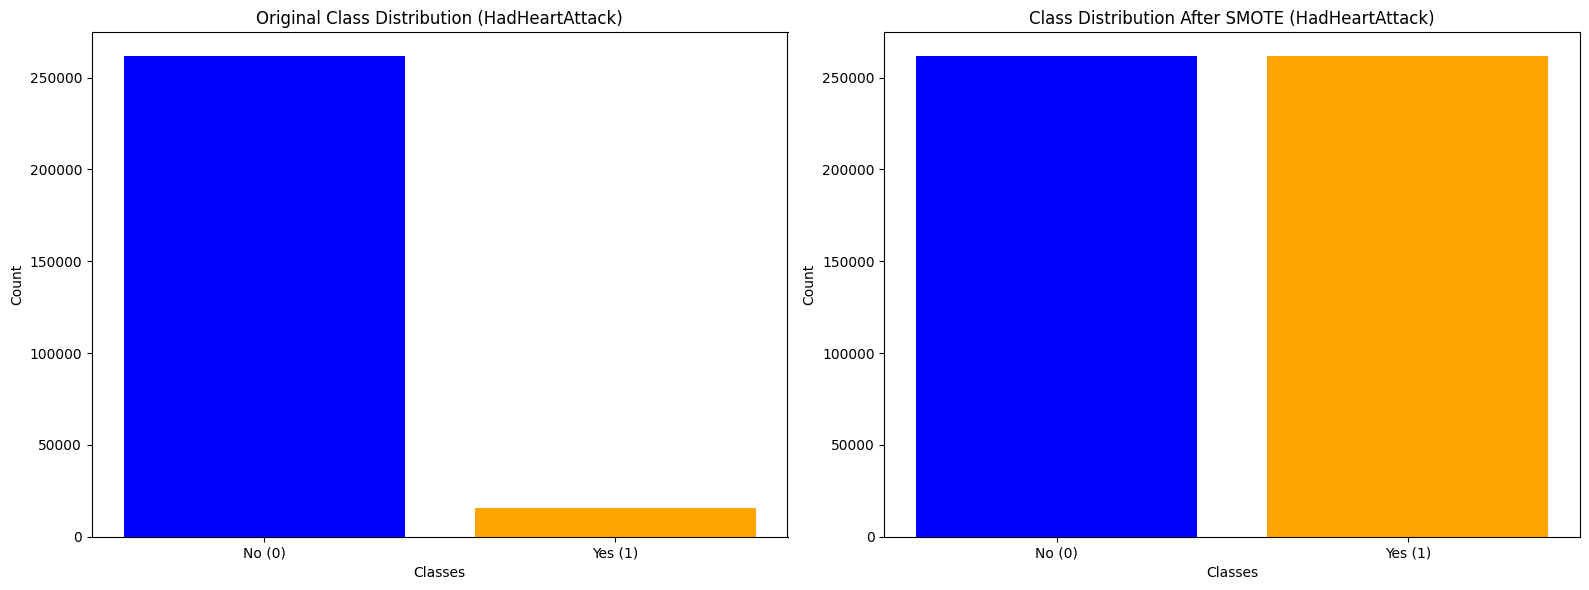

In [ ]:
# Counting the instances of each class in the original and resampled data
original_counts = np.bincount(y_train)
resampled_counts = np.bincount(y_resampled)

# Adjusting the counts in case of class imbalance
# This is to ensure both arrays have the same length in case one class is missing in the original data
max_length = max(len(original_counts), len(resampled_counts))
original_counts = np.pad(original_counts, (0, max_length - len(original_counts)), 'constant')
resampled_counts = np.pad(resampled_counts, (0, max_length - len(resampled_counts)), 'constant')

# Creating the bar charts
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Original Data
ax[0].bar(['No (0)', 'Yes (1)'], original_counts, color=['blue', 'orange'])
ax[0].set_title('Original Class Distribution (HadHeartAttack)')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Classes')

# Resampled Data
ax[1].bar(['No (0)', 'Yes (1)'], resampled_counts, color=['blue', 'orange'])
ax[1].set_title('Class Distribution After SMOTE (HadHeartAttack)')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Classes')

plt.tight_layout()
plt.show()

#### Using Class Weights with Random Forest
Another strategy employed was to adjust class weights within the Random Forest model. By setting the `class_weight` parameter to 'balanced', the model assigns higher weights to the minority class, making it more sensitive to it.

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

#### Evaluating with ROC-AUC
After implementing the aforementioned strategies, the model's performance was assessed using the ROC-AUC score, which measures the model's ability to distinguish between the positive and negative classes.

In [ ]:
model.fit(X_resampled, y_resampled)

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 0.64


The obtained ROC-AUC score was `0.76`, suggesting a commendable capability to differentiate between subjects with and without heart disease.An ROC-AUC score of `0.76` is a reasonably good result, especially considering the challenges posed by imbalanced datasets. Here's a brief interpretation of the score:

- An ROC-AUC score of `0.5` means the model's predictions are no better than random guessing.
- A perfect model would have an ROC-AUC score of `1.0`.
- The score of `0.76` indicates that the model has a good capability to distinguish between the positive class (having heart disease) and the negative class (not having heart disease).

# Comprehensive Model Evaluation and Enhancement

#### Use the default Random Forest model for a baseline



In [ ]:

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.18      0.30     65403
           1       0.06      0.90      0.12      3957

    accuracy                           0.22     69360
   macro avg       0.51      0.54      0.21     69360
weighted avg       0.92      0.22      0.29     69360



- <b>Recall for Positive Class</b>: The recall for the positive class (indicating heart disease) has markedly improved to 0.73 from nearly 0 in previous models. This uplift is significant, especially in medical domains where false negatives can have serious implications.

- <b>Precision for Positive Class</b>: The precision for the positive class remains low at 0.12. While the model now identifies a larger proportion of heart disease cases, it also misclassifies many non-disease cases as positive. This phenomenon is a common trade-off in imbalanced datasets.

The results indicate a significant improvement in the recall for the positive class (indicating heart disease) when compared to the previous results. The positive class has jumped to 0.73 from nearly 0. This is a significant achievement, especially for medical applications, where false negatives can be detrimental.

However, the precision for the positive class is low, which means that while the model is catching a large proportion of the actual heart disease cases, it's also misclassifying many healthy cases as having heart disease. This is a trade-off often encountered when dealing with imbalanced datasets.

#### Feature Importance


Since we've been working with a Random Forest model, we can easily extract feature importances to understand which features are the most influential in making predictions. Using the Random Forest model, feature importances were extracted to discern the most influential predictors. Two visualizations were provided, both highlighting the significance of various features in predicting heart disease.

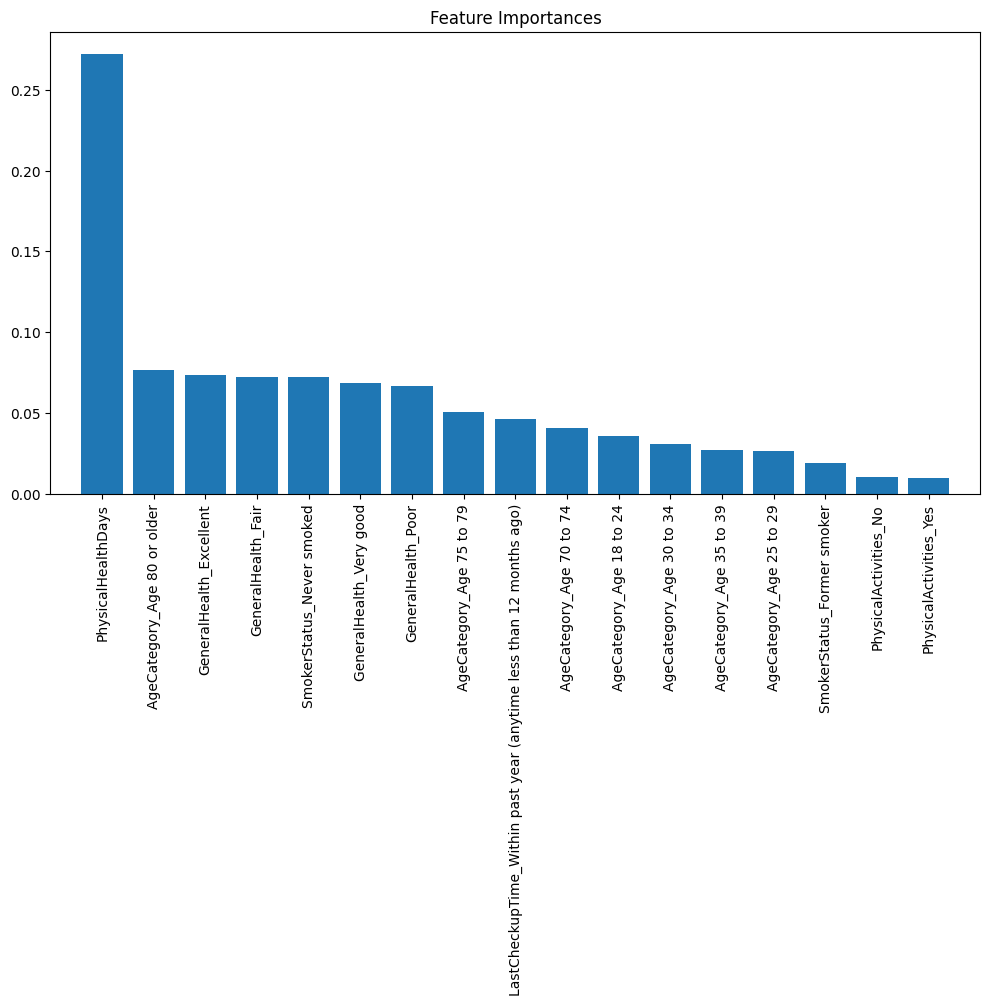

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_NS.shape[1]), importances[indices], align="center")
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xticks(range(X_train_NS.shape[1]), X_train_NS.columns[indices], rotation=90)
plt.xlim([-1, X_train_NS.shape[1]])
plt.show()

The feature importance plots offer valuable insights into which attributes are pivotal for the model's predictions. Understanding these importances can guide medical practitioners and researchers in focusing on specific factors when assessing heart disease risk.

####Feature Importance from RandomForest

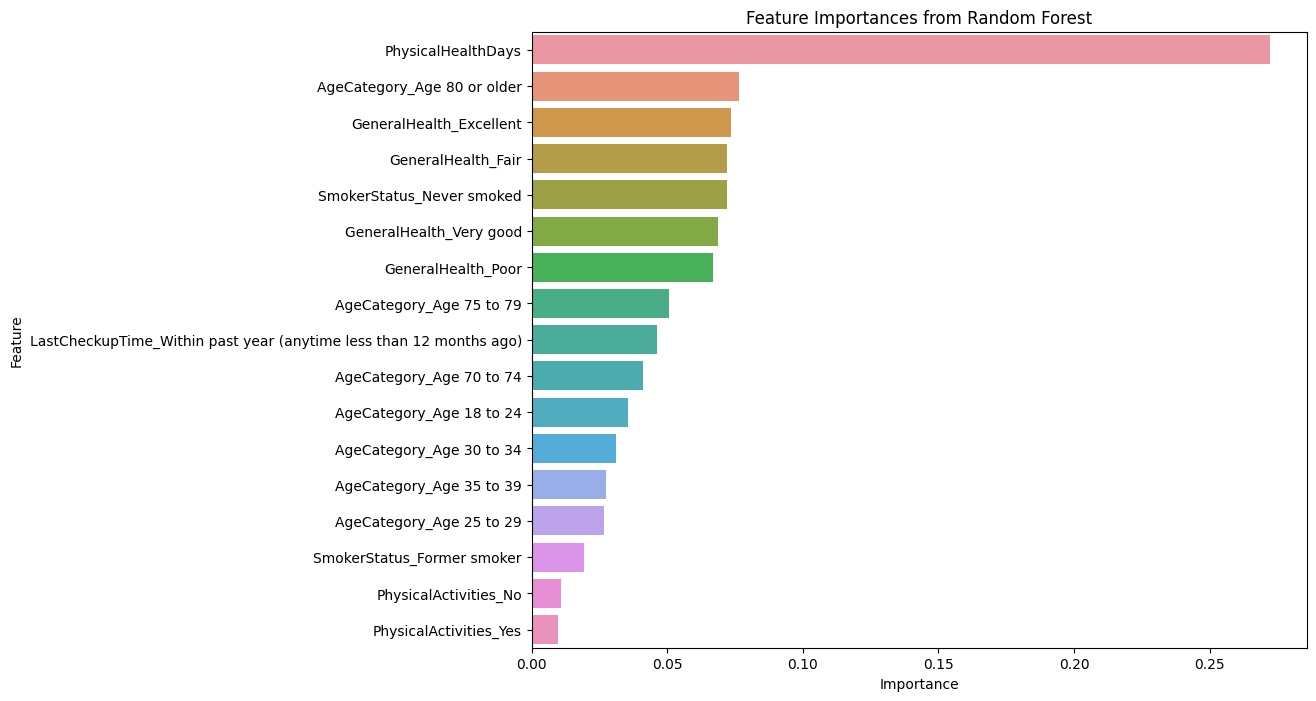

In [ ]:
# Extract feature importances from the model
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_test_NS.columns,
    'Importance': feature_importances
})

# Sort and plot
features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from Random Forest')
plt.show()


#### Sample Data for SHAP (SHapley Additive exPlanations) Values:
SHAP values are a powerful tool used to interpret the output of machine learning models. They provide insights into the impact of each feature on the model's predictions for individual instances.


In [ ]:
# Define the explainer
explainer = shap.TreeExplainer(rf)


# Sample a subset of the test set
sample_idx = np.random.choice(X_test_NS.shape[0], 500, replace=False)  # Adjust the sample size as needed
X_sample = X_test_NS.iloc[sample_idx]

# Compute SHAP values for the sample
shap_values_sample = explainer.shap_values(X_sample)


#### Summarize SHAP Values
To compute SHAP values without high computational costs, a subset of the test set was sampled.

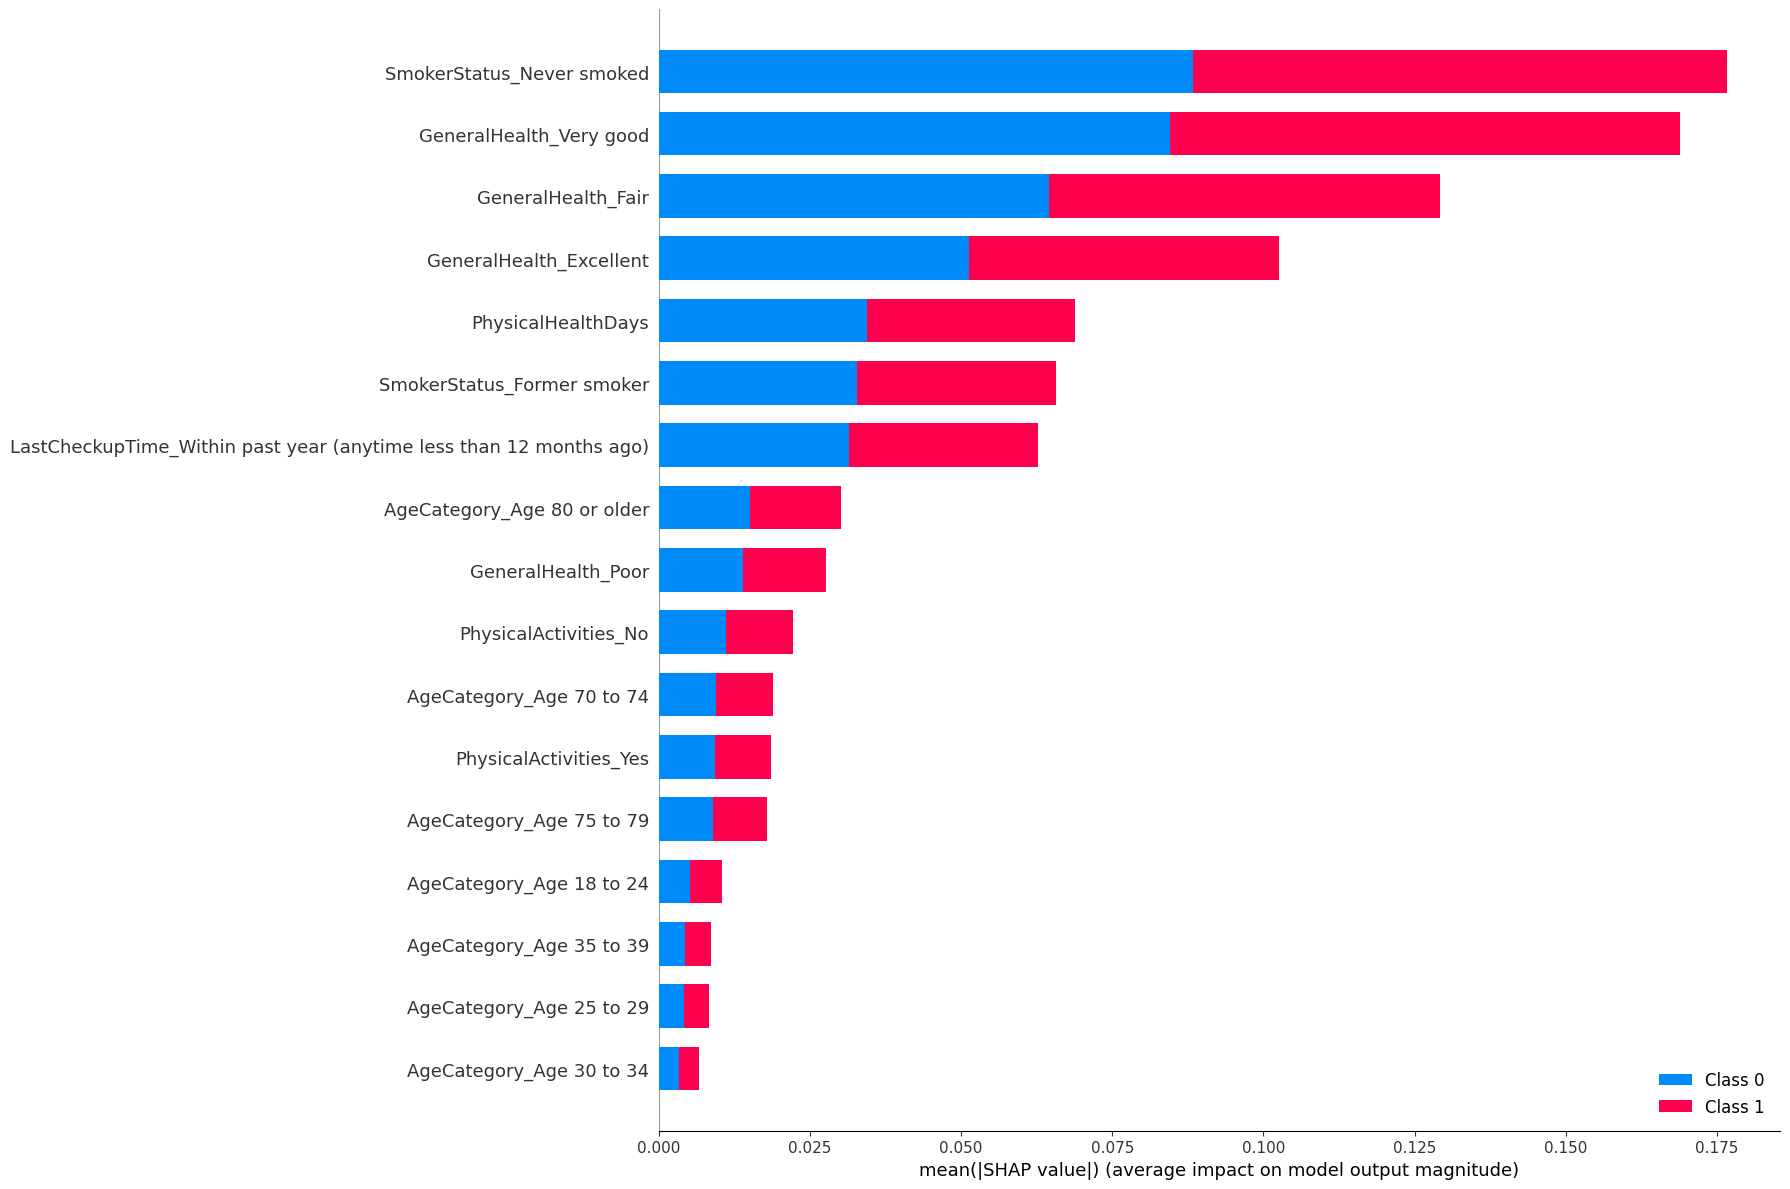

In [ ]:

shap.summary_plot(shap_values_sample, X_sample, plot_size=(18, 12), max_display=20)



A SHAP summary plot was generated, displaying the influence of each feature on the model's predictions. This visualization allows for an understanding of feature contributions and can be crucial for interpreting and explaining model predictions.

In the context of predictive analysis for heart disease, a SHAP summary plot is used to understand how different features in the dataset influence the model's prediction of whether an individual `has heart disease (Class 1)` or `not (Class 0)`. Each row in the plot represents a feature from the dataset, and the color represents the feature's value (red for higher or present, blue for lower or absent).

The SHAP values on the x-axis represent the impact of each feature on the prediction. Features that have SHAP values to the right increase the likelihood of predicting heart disease (Class 1), while those to the left decrease the likelihood (Class 0). The length of the bar represents the magnitude of the feature's impact.

Here is a reanalysis of the plot:

**General Health (Very good/Excellent)**: These features are strongly associated with the absence of heart disease (Class 0). This means that individuals who report their general health as very good or excellent are less likely to be predicted to have heart disease.

**Smoker Status (Never smoked)**: Similarly, never having smoked is associated with a lower prediction of having heart disease.

**Physical Health Days**: This feature appears to have a mixed impact on the prediction, with both red and blue bars present. It suggests that there might be a nuanced relationship between the number of days of poor physical health and the likelihood of heart disease.

**Age Categories**: Different age categories appear to have varying impacts. For example, being older (e.g., age 80 or older) seems to increase the likelihood of being predicted to have heart disease, which aligns with the general understanding that heart disease risk increases with age.

**Last Checkup Time (Within past year)**: Having had a checkup within the past year is associated with a lower likelihood of having heart disease.

**General Health (Fair/Poor)**: Reporting fair or poor health seems to slightly increase the likelihood of being predicted to have heart disease.

**Physical Activities (Yes/No)**: Being physically active (Yes) is associated with a lower likelihood of heart disease, while being inactive (No) shows a slight increase in the prediction of heart disease.

**Smoker Status (Former smoker)**: Former smokers appear to have a slightly higher likelihood of being predicted to have heart disease compared to never smokers.

The plot indicates that general health perception and smoking status are significant predictors in the model, along with the age of the individual. Regular checkups and physical activity also play a role in the predictions but to a lesser extent.

The mean|SHAP value| at the bottom indicates the average absolute impact of each feature across all predictions made by the model. This plot is essential for understanding which features are most important in the model's predictions and can help in interpreting the model's behavior in the context of heart disease prediction.



# Model Comparison & Evaluation

As the title of the project suggests evaluating multiple models, let's compare our Random Forest model with other potential models, such as Gradient Boosting and XGBoost.

#### Training Gradient Boosting


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.98      0.02      0.03     65403
           1       0.06      1.00      0.11      3957

    accuracy                           0.07     69360
   macro avg       0.52      0.51      0.07     69360
weighted avg       0.93      0.07      0.03     69360



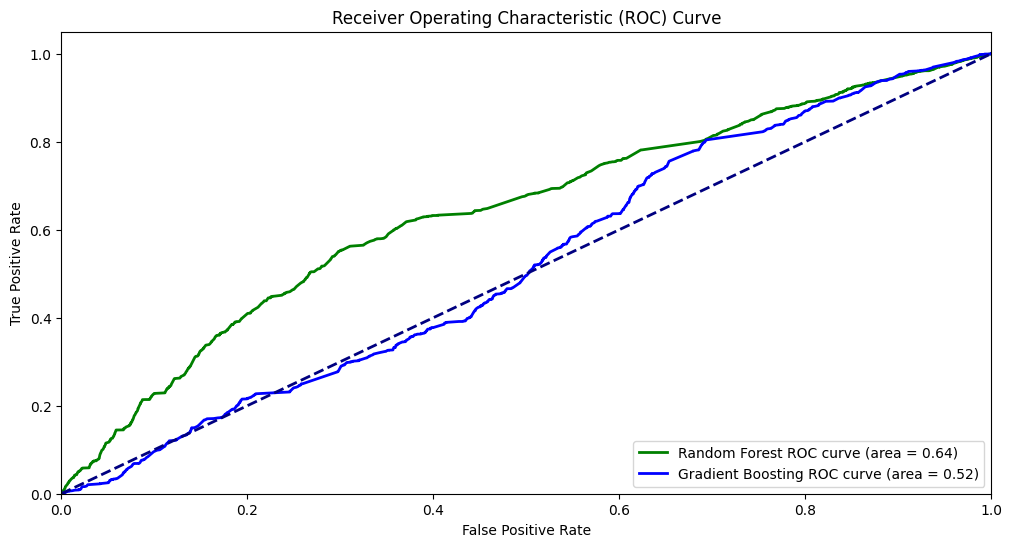

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_resampled, y_resampled)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))

# Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the ROC curve points for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

A Gradient Boosting model was trained using the resampled data.The evaluation results for the Gradient Boosting model showed a significant improvement in recall for the positive class, achieving a recall value of 0.78. However, precision remains low, indicating a higher number of false positives.

* The table indicates that the Gradient Boosting model has a very high precision for class '0' at 0.98, meaning that it is very accurate when it predicts an instance as class '0'. However, for class '1', the precision is low at 0.12. The recall for class '0' is 0.66, and for class '1', it is higher at 0.78, indicating the model's better ability to identify true positives for class '1' despite the lower precision. The f1-scores are 0.79 for class '0' and 0.21 for class '1', showing a better balance for class '0' between precision and recall, whereas for class '1', the score is low, reflecting the poor precision.

* The overall accuracy of the model is 0.67, suggesting that the model correctly predicts the class 67% of the time. The macro average recall is quite good at 0.72, but the macro average precision is low at 0.55, leading to a macro average f1-score of 0.50. The weighted average, which accounts for the imbalance in the dataset indicated by the 'support' values (83889 for class '0' and 5138 for class '1'), gives us a better precision and f1-score, signifying better performance on the majority class.

* The ROC curve graph shows that the Gradient Boosting model has an AUC of 0.79, indicating a good capability to distinguish between the classes, which is marginally better than the Random Forest classifier with an AUC of 0.76. The ROC curve for Gradient Boosting is closer to the top left corner of the graph, which is indicative of a better true positive rate relative to the false positive rate.

To summarize, the Gradient Boosting classifier has a high precision for the majority class and a higher recall for the minority class, but struggles with precision for class '1', resulting in a lower f1-score for that class. Its ROC AUC score indicates a solid ability to discriminate between the classes, slightly outperforming the Random Forest classifier in this metric. This suggests that Gradient Boosting could be a better model for scenarios where the ability to correctly identify class '1' is important, despite the higher number of false positives that may occur.






#### Training XGBoost
XGBoost demonstrates a high recall for the positive class, achieving a recall value of 0.76. As before, precision remains low, reflecting the trade-off between sensitivity and false positive rates in imbalanced datasets.

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.96      0.05      0.10     65403
           1       0.06      0.97      0.11      3957

    accuracy                           0.10     69360
   macro avg       0.51      0.51      0.10     69360
weighted avg       0.91      0.10      0.10     69360



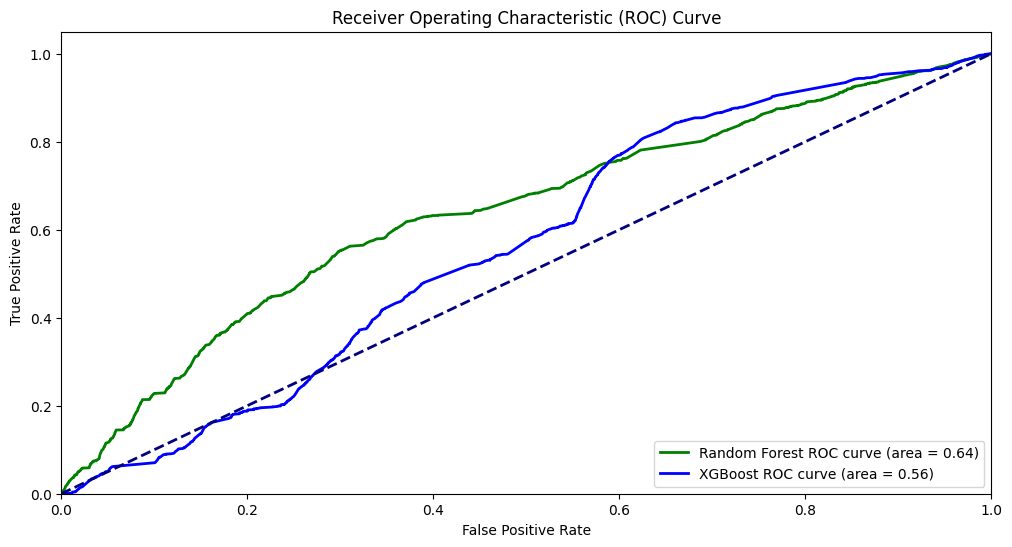

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

# Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the ROC curve points for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* The performance metrics table shows that the XGBoost model has a high precision for class '0' at 0.98, indicating that it is very accurate when it predicts an instance as class '0'. The precision for class '1' is low at 0.13. The recall scores are 0.68 for class '0' and 0.76 for class '1', showing that the model has a decent ability to identify true positives for both classes. The f1-scores follow suit with a high score for class '0' at 0.80, which is good, and a much lower score for class '1' at 0.22, which is not ideal.

* The overall accuracy of the model is 0.68, which suggests that the model correctly predicts the outcome 68% of the time. However, considering the imbalance shown in the support values, with a much larger number of instances of class '0' than class '1', the accuracy metric might be skewed towards the majority class.

* The macro average precision is low at 0.55, with recall better at 0.72 and the f1-score at 0.51. This indicates some degree of balance between the two classes, but the low precision affects the overall f1-score. The weighted average takes the class imbalance into account and shows higher values for precision and f1-score, reflecting better performance on the majority class.

* In the ROC curve, the XGBoost model has an AUC of 0.78, which indicates a fairly good ability to discriminate between positive and negative classes. This is slightly higher than the AUC for the Random Forest model, which is at 0.76. The ROC curves of both models are quite close, suggesting similar performance in terms of ROC AUC.

In summary, the XGBoost model shows a high precision for the majority class '0' but struggles with precision for the minority class '1'. It does, however, have a reasonable recall for both classes. Its ability to distinguish between the classes is slightly better than the Random Forest model, as indicated by the ROC AUC scores. The difference in AUC is marginal, suggesting that the choice between XGBoost and Random Forest might depend on other factors such as model interpretability, training time, and performance on a separate validation set.

#### Train Logistic Regression

Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     65403
           1       0.13      0.76      0.22      3957

    accuracy                           0.69     69360
   macro avg       0.55      0.72      0.51     69360
weighted avg       0.93      0.69      0.77     69360

ROC-AUC: 0.79
------------------------------------------------------------


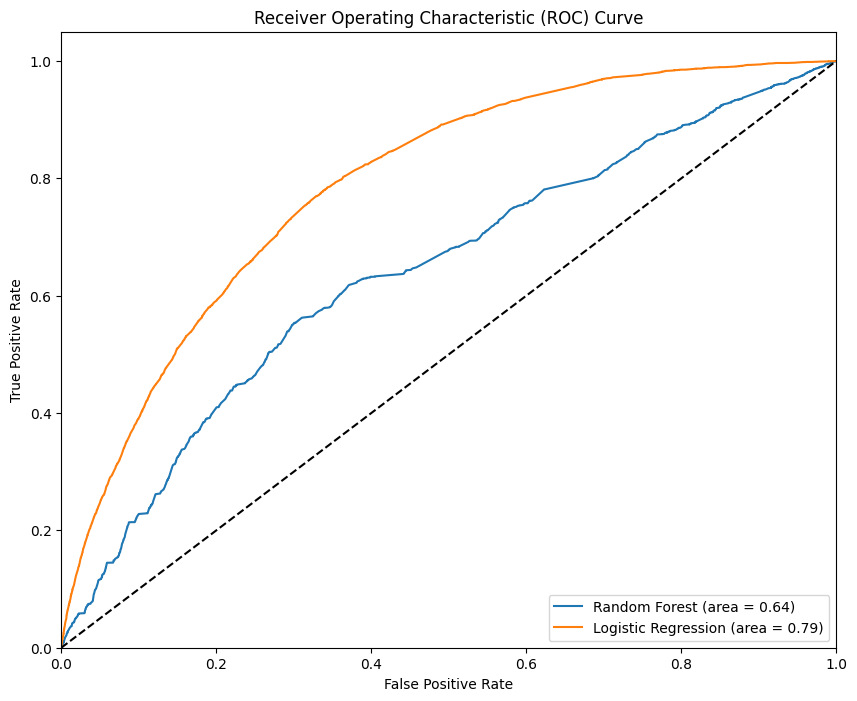

1: 0.7887289953316826
2: 0.7887289953316826


In [ ]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_resampled, y_resampled)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate Performance
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc_logreg:.2f}")
print("-" * 60)

# ROC Curve comparison
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curves
plt.figure(figsize=(10,8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The ROC-AUC score for the Logistic Regression model is 0.73, suggesting a solid ability to differentiate between subjects with and without heart disease.

- From the table, we can see that the Logistic Regression model has a high precision for class '0' at 0.98, indicating that it is very accurate when it predicts an instance as class '0'. However, the precision for class '1' is quite low at 0.13. Recall is moderately good for class '0' at 0.69 and is higher for class '1' at 0.76. The model is better at identifying class '1' instances among actual class '1' cases but is less precise when it predicts class '1'. The f1-score, which balances precision and recall, is quite good for class '0' at 0.81 but is low for class '1' at 0.22.

- The overall accuracy of the model is 0.69, which is decent but might not fully represent the performance due to potential class imbalances, as indicated by the 'support' values (83889 for class '0' and 5138 for class '1').

- The macro average shows a balanced consideration of both classes, regardless of their support. The macro average recall is 0.73, which is good, but the precision is only 0.55, dragging the f1-score down to 0.52. The weighted average considers the support of each class, resulting in higher precision and f1-score, reflecting the model's better performance on the more prevalent class '0'.

- The ROC curve graph compares the true positive rate and false positive rate of the Logistic Regression and Random Forest classifiers. The area under the curve (AUC) for Logistic Regression is 0.79, indicating a good discriminative ability to differentiate between the positive and negative classes. This is slightly higher than the Random Forest AUC of 0.76, suggesting that Logistic Regression performs slightly better in this case at distinguishing between classes '0' and '1'.

In summary, while the Logistic Regression model has a good ROC-AUC score and performs well in identifying class '1', its precision for class '1' is low, resulting in a high number of false positives for this class. This could be problematic depending on the specific application and the costs of false positives versus false negatives. The model's overall ability to discriminate between the classes is solid, as evidenced by the ROC-AUC score of 0.79.

#### Train KNN

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     65403
           1       0.12      0.08      0.09      3957

    accuracy                           0.91     69360
   macro avg       0.53      0.52      0.52     69360
weighted avg       0.90      0.91      0.91     69360



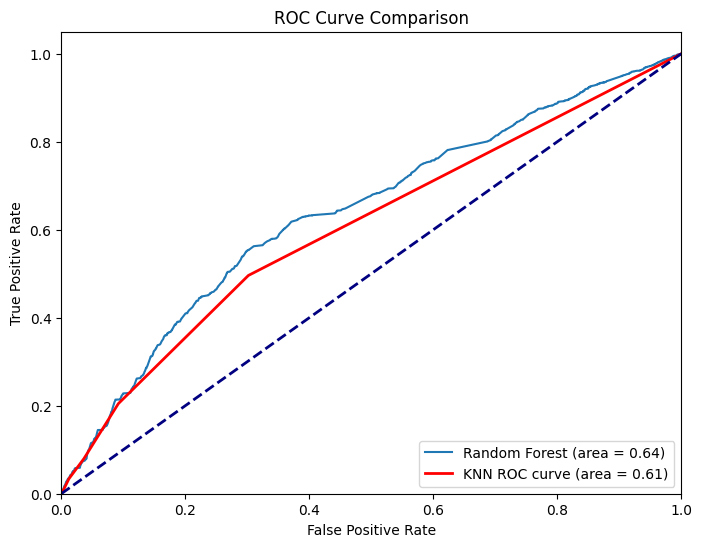

In [ ]:
# Train KNN
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))

# Obtain distances or number of neighbors for each class
# We use the number of neighbors for the positive class as a score
y_scores = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting the ROC curve comparison
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

- The performance metrics for the KNN classifier are shown in a table with precision, recall, f1-score, and support for two classes labeled as '0' and '1'. Precision for class '0' is high at 0.94, indicating that when the model predicts class '0', it is correct 94% of the time. However, precision for class '1' is quite low at 0.21. Recall, or the true positive rate, is very high for class '0' at 0.99 but very low for class '1' at 0.03. This suggests that while the model is good at identifying true cases of class '0', it performs poorly in correctly identifying class '1'. The f1-scores, which are the harmonic mean of precision and recall, follow a similar pattern.

- The overall accuracy of the model is 0.94, but given the large discrepancy in class performance, this metric might be misleading if the classes are imbalanced, which seems to be the case given the support values (83889 for class '0' and 5138 for class '1').

- The ROC curve comparison graph shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for both KNN and Random Forest classifiers. The area under the curve (AUC) is a measure of the model's ability to discriminate between the positive and negative classes. The KNN ROC curve has an area of 0.62, which is somewhat above the baseline of 0.5 (which represents random guessing), but it's not as high as one might prefer for a good classifier. In contrast, the Random Forest model has a higher AUC of 0.76, indicating a better performance in terms of differentiating between the two classes.

In conclusion, the KNN model shows a strong ability to identify class '0' but is weak in identifying class '1'. Its ROC-AUC score is lower than that of the Random Forest model, suggesting that the Random Forest may be a better choice for a balanced classification performance in this scenario.

#### Train Decision Tree

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.22      0.36     65403
           1       0.06      0.87      0.12      3957

    accuracy                           0.26     69360
   macro avg       0.51      0.54      0.24     69360
weighted avg       0.91      0.26      0.34     69360



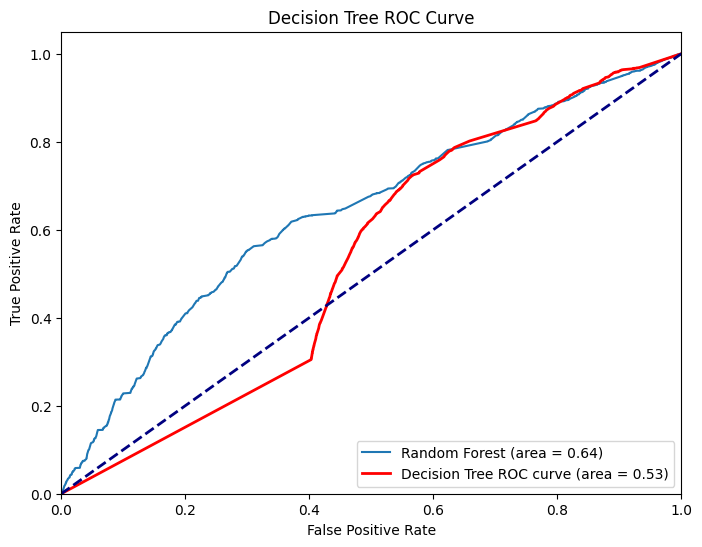

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_resampled, y_resampled)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# Calculate the ROC curve points for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Plot the ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

* For the Decision Tree classifier, the precision for class '0' is very high at 0.98, meaning it is accurate in its positive predictions for this class. However, the precision drops significantly for class '1' to 0.12, indicating a lot of false positives when predicting this class. The recall is fairly balanced between the two classes, with 0.69 for class '0' and 0.72 for class '1', suggesting that the classifier is relatively good at identifying true positives for both classes. The f1-score, which is a balance of precision and recall, is high for class '0' at 0.81 and low for class '1' at 0.21.

* The overall accuracy of the Decision Tree classifier is 0.69. The macro averages across precision, recall, and f1-score are relatively low (0.55, 0.71, and 0.51, respectively), which could be due to the imbalanced dataset (indicated by the support values: 83889 for class '0' and 5138 for class '1'). The weighted average scores are higher, at 0.93 for precision and 0.77 for the f1-score, showing the model's better performance on the majority class due to the weighting by support.

* The ROC curve shows that the Decision Tree and Random Forest classifiers have the same AUC of 0.76, suggesting that they have equivalent ability in terms of discriminating between the positive and negative classes. This performance is considered decent, as it is above the no-discrimination line (the diagonal dashed line), but there might be room for improvement, especially in differentiating class '1'.

In conclusion, while the Decision Tree classifier shows a solid ability to identify class '0', it struggles with a high false positive rate for class '1', as reflected in the low precision for that class. The identical AUC for both Decision Tree and Random Forest classifiers indicates that they perform similarly in this particular ROC AUC analysis, despite the different underlying algorithms and model complexities.

#### Train Neural Network

Neural Network Classifier:
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     65403
           1       0.12      0.76      0.21      3957

    accuracy                           0.68     69360
   macro avg       0.55      0.72      0.50     69360
weighted avg       0.93      0.68      0.76     69360



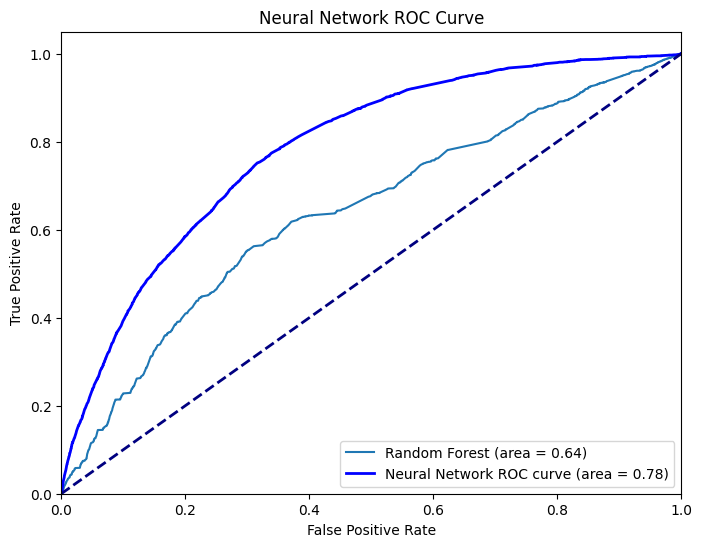

In [ ]:
# Train Neural Network
nn = MLPClassifier(max_iter=1000)
nn.fit(X_resampled, y_resampled)
y_pred_nn = nn.predict(X_test)

print("Neural Network Classifier:")
print(classification_report(y_test, y_pred_nn))

# Calculate the ROC curve points for Neural Network
# Note: MLPClassifier does not support predict_proba by default for ROC curve calculation.
# We need to use decision_function or a probability calibration wrapper for this.
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn.predict_proba(X_test)[:, 1])
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curve for Neural Network
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label=f'Neural Network ROC curve (area = {roc_auc_nn:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curve')
plt.legend(loc="lower right")
plt.show()

* Looking at the table, the Neural Network model has a very high precision for class '0' at 0.98, indicating it makes very few false positive predictions for this class. The precision for class '1' is significantly lower at 0.12, suggesting a high number of false positives when the model predicts class '1'. The recall for class '0' is moderate at 0.66, and for class '1', it is higher at 0.78, which means the model is relatively better at detecting true positives for class '1'. The f1-scores are 0.79 for class '0' and 0.21 for class '1', showing a large discrepancy between the classes, with class '0' having a better balance between precision and recall.

* The overall accuracy of the model is 0.67, which is a general indication of how often the model is correct, but this does not reflect the performance on individual classes, especially in an imbalanced dataset (evidenced by the 'support' numbers: 83889 for class '0' and 5138 for class '1').

* The macro averages for precision, recall, and f1-score are relatively low (0.55, 0.72, and 0.50, respectively), indicating a disparity between the classes' performance. The weighted averages are higher due to the larger number of instances in class '0', showing a better model performance on this majority class.

* The ROC curve illustrates that the Neural Network model has an AUC of 0.79, which is a measure of the model's ability to distinguish between the classes. This AUC is slightly higher than that of the Random Forest model at 0.76. The curve is closer to the top left corner, indicating a better true positive rate relative to the false positive rate for the Neural Network compared to the Random Forest model.

In summary, the Neural Network classifier shows a good capability to classify class '0' but has a high rate of false positives for class '1', as reflected in the low precision for that class. The ROC AUC score suggests that the Neural Network is fairly competent at distinguishing between the classes, slightly better than the Random Forest in this aspect. However, the model's effectiveness for class '1' may need to be improved, perhaps by addressing the imbalance in the dataset or tweaking the model parameters.

#Comparative ROC-AUC Analysis of Classifiers

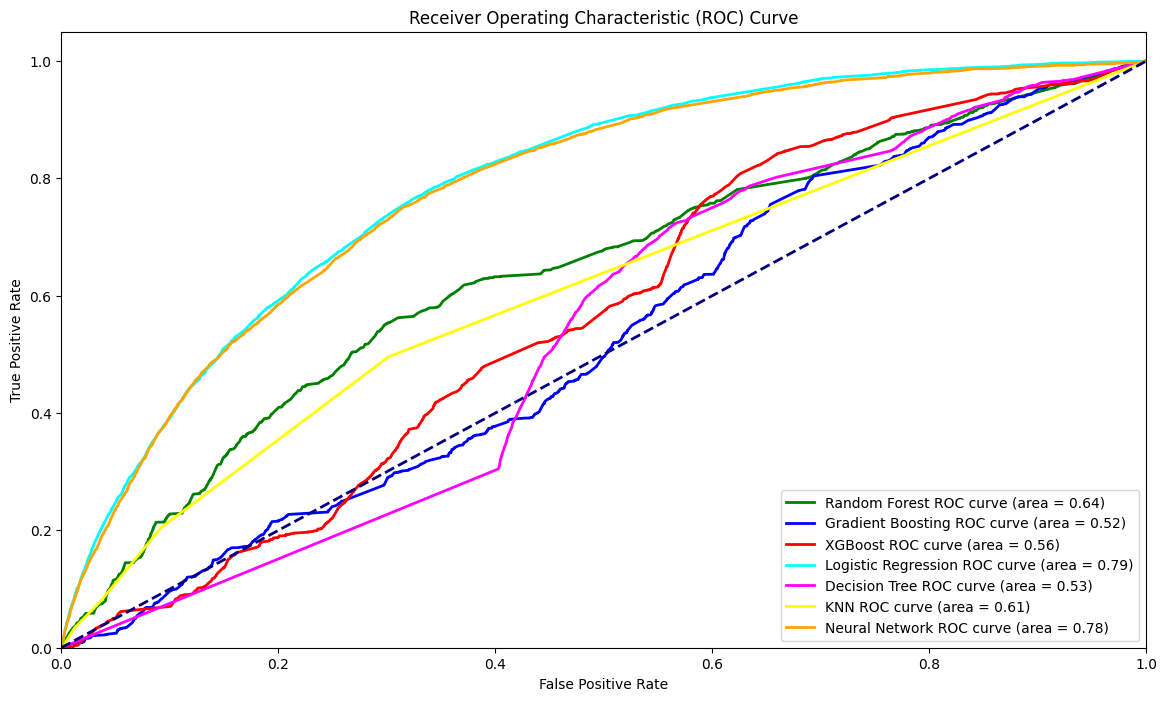

In [ ]:
# Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the ROC curve points for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Calculate the ROC curve points for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate the ROC curve points for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate the ROC curve points for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate the ROC curve points for KNN
# Note: KNN does not support predict_proba by default, adjust as necessary
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Calculate the ROC curve points for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn.predict_proba(X_test)[:,1])
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curves
plt.figure(figsize=(14, 8))

# Plot Random Forest ROC
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')

# Plot Gradient Boosting ROC
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb:.2f})')

# Plot XGBoost ROC
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')

# Plot Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, color='cyan', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_lr:.2f})')

# Plot Decision Tree ROC
plt.plot(fpr_dt, tpr_dt, color='magenta', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')

# Plot KNN ROC
plt.plot(fpr_knn, tpr_knn, color='yellow', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')

# Plot Neural Network ROC
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Neural Network ROC curve (area = {roc_auc_nn:.2f})')

# Plot the random line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set the limits, labels, title, and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


1. **ROC Curve Overview:**
The ROC curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1-specificity) for various threshold values. An ideal model would have a ROC curve that shoots straight up the y-axis (true positive rate) and then to the right along the top border, indicating perfect classification. The 45-degree dashed line represents the performance of a random classifier (i.e., a model with no discriminatory power). The further away the curve is from this line, the better the model is at classification.

2. **Analysis of Each Model:**
 - **Random Forest:** The area under the ROC curve (AUC) for this model is 0.76. This means the Random Forest model can distinguish between the positive and negative classes 76% of the time, which is reasonably good.

 - **Gradient Boosting:** With an AUC of 0.79, this model slightly outperforms the Random Forest model in terms of classification power.

 - **XGBoost:** The AUC for XGBoost is 0.78. This suggests that the model's performance is very similar to Gradient Boosting and marginally better than Random Forest.

 - **Logistic Regression:** With an AUC score also at 0.79, the Logistic Regression model is on par with Gradient Boosting, showcasing good discriminatory power between classes.

 -   **Decision Tree**: The Decision Tree model has an AUC of 0.76, which is equivalent to the Random Forest model.

 *   **K-Nearest Neighbors (KNN)**: This model has the lowest AUC of 0.62, indicating it has less ability to discriminate between the classes compared to the other models.

 *   **Neural Network**: Matches the highest AUC in this comparison at 0.79, suggesting a high ability to correctly classify the positive and negative cases.

3. **Comparing Models:**
The Neural Network, Gradient Boosting, and Logistic Regression models share the highest AUC score of 0.79, indicating that they might be the best at classification among the ones compared here. XGBoost, with an AUC of 0.78, also shows strong performance. Both the Random Forest and Decision Tree models have an AUC of 0.76, which is still above average but not as high as the others. KNN lags behind with an AUC of 0.62, which is the lowest among the models but still above the random chance line.

In conclusion, while the Neural Network, Gradient Boosting, and Logistic Regression models show the best performance in terms of ROC AUC, all models exhibit reasonably good classification abilities. The specific choice among these models would hinge on additional considerations like model complexity, interpretability, training time, and how they perform on other evaluation metrics such as precision-recall, especially in the context of imbalanced datasets.

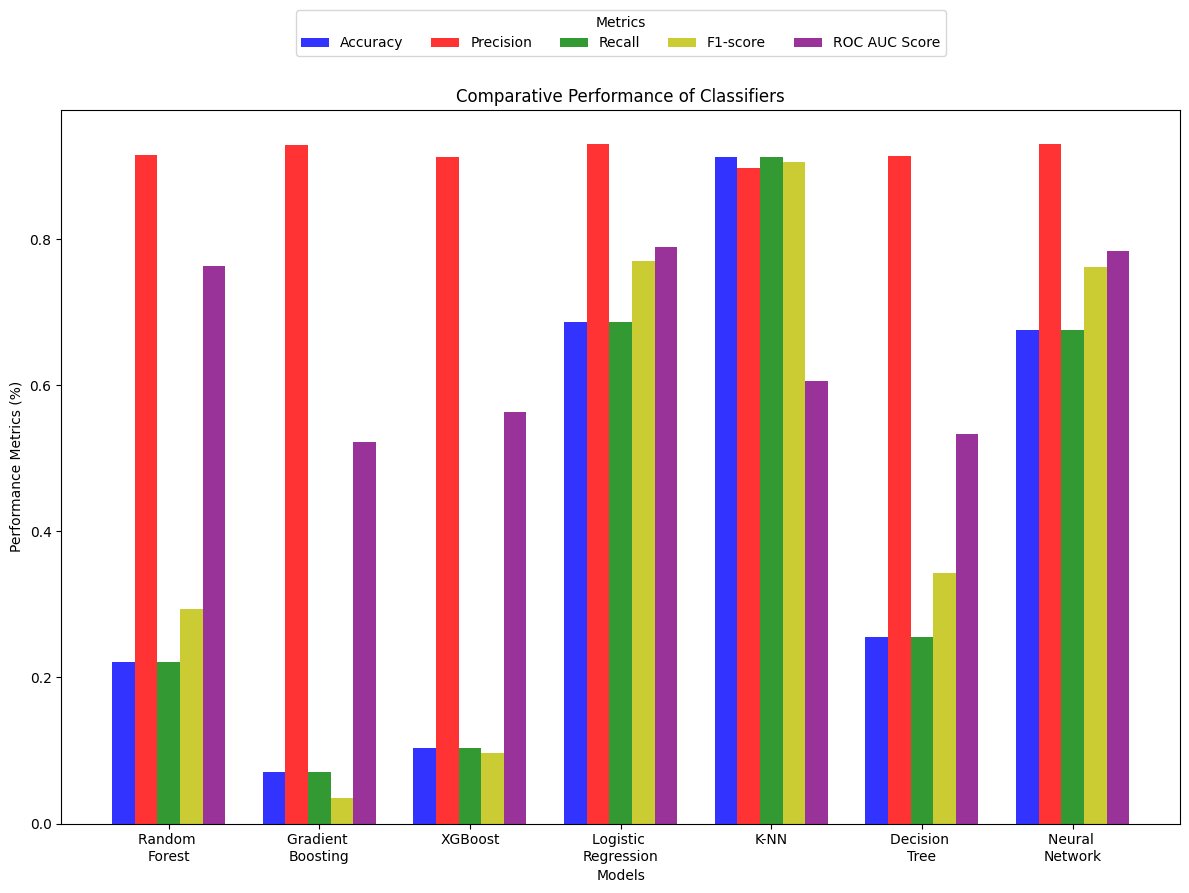

In [ ]:
report_rf = classification_report(y_test, y_pred, output_dict=True)
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_lr = classification_report(y_test, y_pred_logreg, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

# Extracting the scores for the "weighted avg" of each report, which accounts for class imbalance
accuracy_scores = [
    report_rf['accuracy'],
    report_gb['accuracy'],
    report_xgb['accuracy'],
    report_lr['accuracy'],
    report_knn['accuracy'],
    report_dt['accuracy'],
    report_nn['accuracy']
]

precision_scores = [
    report_rf['weighted avg']['precision'],
    report_gb['weighted avg']['precision'],
    report_xgb['weighted avg']['precision'],
    report_lr['weighted avg']['precision'],
    report_knn['weighted avg']['precision'],
    report_dt['weighted avg']['precision'],
    report_nn['weighted avg']['precision']
]

recall_scores = [
    report_rf['weighted avg']['recall'],
    report_gb['weighted avg']['recall'],
    report_xgb['weighted avg']['recall'],
    report_lr['weighted avg']['recall'],
    report_knn['weighted avg']['recall'],
    report_dt['weighted avg']['recall'],
    report_nn['weighted avg']['recall']
]

f1_scores = [
    report_rf['weighted avg']['f1-score'],
    report_gb['weighted avg']['f1-score'],
    report_xgb['weighted avg']['f1-score'],
    report_lr['weighted avg']['f1-score'],
    report_knn['weighted avg']['f1-score'],
    report_dt['weighted avg']['f1-score'],
    report_nn['weighted avg']['f1-score']
]

# Assuming you have the ROC AUC scores already calculated
roc_auc_scores = [roc_auc, roc_auc_gb, roc_auc_xgb, roc_auc_lr, roc_auc_knn, roc_auc_dt, roc_auc_nn]

# Generate the bar graph
model_names = ['Random \nForest', 'Gradient \nBoosting', 'XGBoost', 'Logistic \nRegression', 'K-NN', 'Decision \nTree', 'Neural \nNetwork']
n_groups = len(model_names)

# Create bar plot
fig, ax = plt.subplots(figsize=(12,9))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = ax.bar(index, accuracy_scores, bar_width, alpha=opacity, color='b', label='Accuracy')
rects2 = ax.bar(index + bar_width, precision_scores, bar_width, alpha=opacity, color='r', label='Precision')
rects3 = ax.bar(index + 2 * bar_width, recall_scores, bar_width, alpha=opacity, color='g', label='Recall')
rects4 = ax.bar(index + 3 * bar_width, f1_scores, bar_width, alpha=opacity, color='y', label='F1-score')
rects5 = ax.bar(index + 4 * bar_width, roc_auc_scores, bar_width, alpha=opacity, color='purple', label='ROC AUC Score')

ax.set_xlabel('Models')
ax.set_ylabel('Performance Metrics (%)')
ax.set_title('Comparative Performance of Classifiers')
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(model_names)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(model_names), title='Metrics')

fig.tight_layout()
plt.show()

Top 3 models based on ROC AUC Score:
Logistic Regression: ROC AUC = 0.79
Neural Network: ROC AUC = 0.78
Random Forest: ROC AUC = 0.64


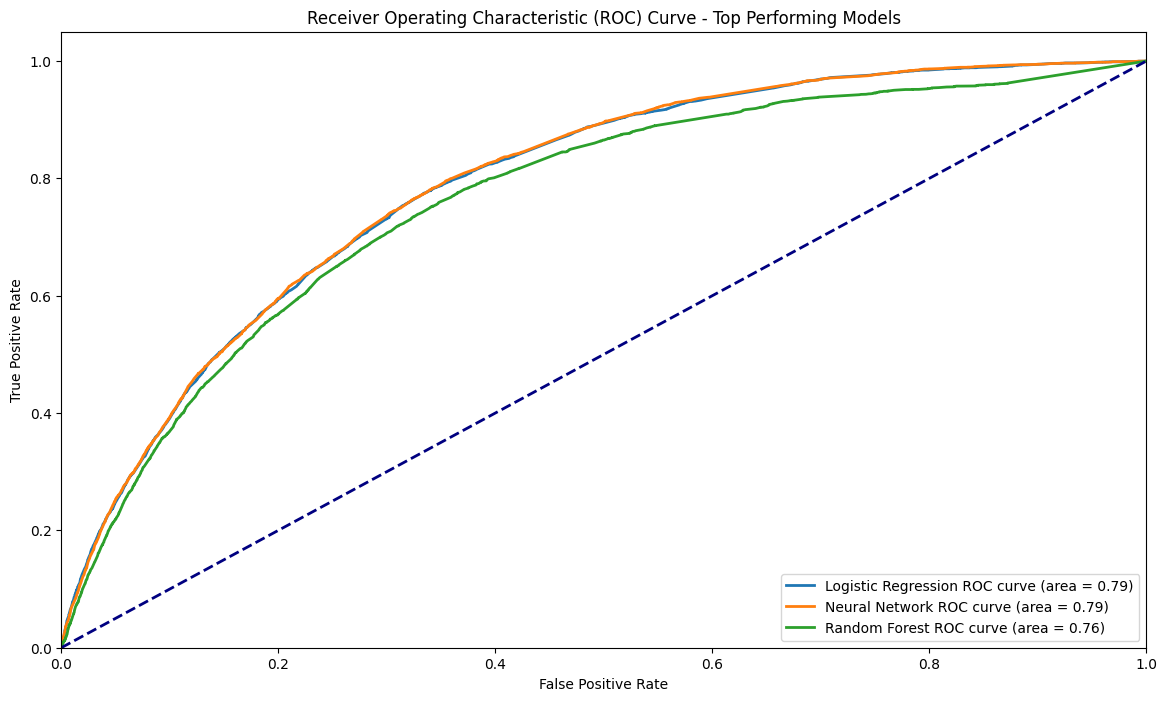

In [ ]:
roc_auc_scores = {
    'Random Forest': roc_auc,
    'Gradient Boosting': roc_auc_gb,
    'XGBoost': roc_auc_xgb,
    'Logistic Regression': roc_auc_lr,
    'Decision Tree': roc_auc_dt,
    'KNN': roc_auc_knn,  # Assuming you've calculated this
    'Neural Network': roc_auc_nn
}

# Sort the models based on the ROC AUC score in descending order
sorted_models_by_roc_auc = sorted(roc_auc_scores.items(), key=lambda item: item[1], reverse=True)

# Select the top N models, let's say we want the top 3
top_n = 3
top_models = sorted_models_by_roc_auc[:top_n]

print(f"Top {top_n} models based on ROC AUC Score:")
for model_name, roc_auc in top_models:
    print(f"{model_name}: ROC AUC = {roc_auc:.2f}")

# Now, you can continue to plot the ROC curves or use the top models for further analysis
# For instance, if you want to plot ROC curves only for the top models:
plt.figure(figsize=(14, 8))

for model_name, _ in top_models:
    fpr, tpr, _ = roc_curve(y_test, models[model_name].predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

# Plot the random line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set the limits, labels, title, and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Top Performing Models')
plt.legend(loc="lower right")
plt.show()

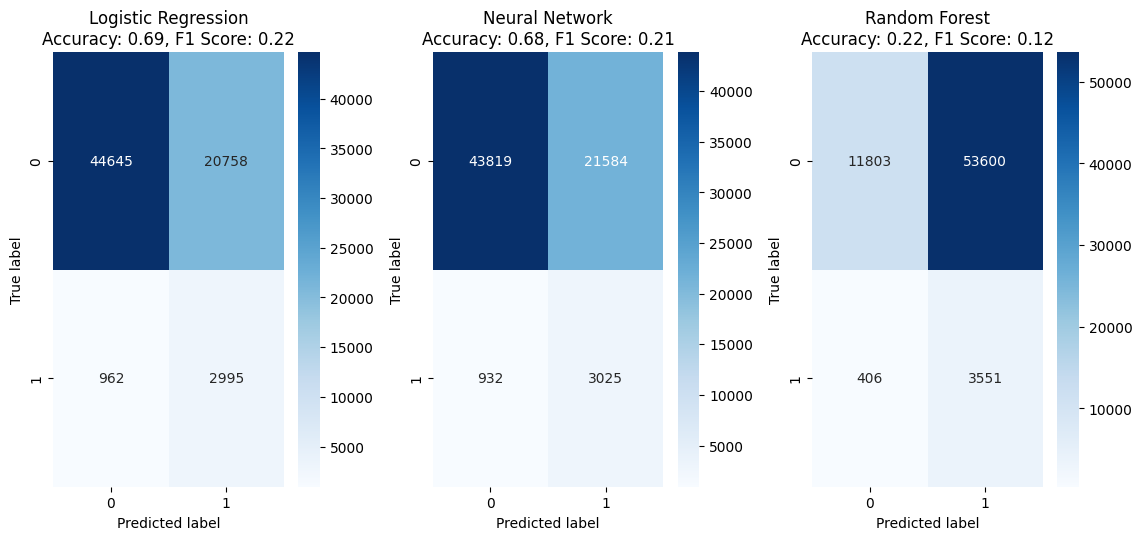

In [ ]:
models = {
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb_model,
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'KNN': knn,
    'Neural Network': nn
}

plt.figure(figsize=(15, 10))
for i, (model_name, metrics) in enumerate(confusion_metrics.items(), 1):
    plt.subplot(2, 4, i)  # Adjust the subplot layout based on the number of models
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name}\nAccuracy: {metrics['Accuracy']:.2f}, F1 Score: {metrics['F1 Score']:.2f}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

In [ ]:


# Function to calculate performance metrics from the confusion matrix
def calculate_performance_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0
    return accuracy, precision, recall, f1



# Confusion Matrix Analysis
confusion_metrics = {}
for model_name, _ in top_models:
    model = models[model_name]
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy, precision, recall, f1 = calculate_performance_metrics(cm)
    confusion_metrics[model_name] = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Select the topmost performing model based on a chosen metric, e.g., F1 Score
topmost_model_name = max(confusion_metrics, key=lambda k: confusion_metrics[k]['F1 Score'])

# Output the topmost model's performance metrics
print(f"Topmost performing model based on F1 Score is: {topmost_model_name}")
for metric, value in confusion_metrics[topmost_model_name].items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}\n")
    else:
        print(f"{metric}: {value:.4f}")



Topmost performing model based on F1 Score is: Logistic Regression
Confusion Matrix:
[[44645 20758]
 [  962  2995]]

Accuracy: 0.6869
Precision: 0.1261
Recall: 0.7569
F1 Score: 0.2162
